In [1]:
# dependencies
import random
import pandas as pd
import requests
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
import json
import datetime
import time
from datetime import datetime

In [2]:
filename = "AllSampleWYears_lat&lng.csv"
df = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
df.head(2)

,Duration,Start date,End date,Start station #,Start station,Start Station Lat,Start Station Lng,End station #,End station,LATITUDE,LONGITUDE,Bike number,Member type,LOCKED,INSTALL_DATE,REMOVAL_DATE,NUMBER_OF_BIKES
0,6023,2015-01-01 00:35:55,2015-01-01 02:16:19,31503,Florida Ave & R St NW,38.912600,-77.013500,31508,Gallaudet / 8th St & Florida Ave NE,38.905090,-76.994100,W00170,Member,NO,NaN,NaN,1.0
1,717,2015-01-01 01:04:42,2015-01-01 01:16:40,31252,21st St & Pennsylvania Ave NW,38.901539,-77.046564,31258,Lincoln Memorial,38.888251,-77.049426,W20243,Member,NO,NaN,NaN,5.0


In [3]:
df.columns

Index(['Duration', 'Start date', 'End date', 'Start station #',
       'Start station', 'Start Station Lat', 'Start Station Lng',
       'End station #', 'End station', 'LATITUDE', 'LONGITUDE', 'Bike number',
       'Member type', 'LOCKED', 'INSTALL_DATE', 'REMOVAL_DATE',
       'NUMBER_OF_BIKES'],
      dtype='object')

In [4]:
df = df.rename(columns={'Duration': 'Duration', 
                        'Start date': 'Start date', 
                        'End date': 'End date', 
                        'Start station #': 'Start station number',
                        'Start station': 'Start station', 
                        'Start Station Lat': 'Start station lat', 
                        'Start Station Lng': 'Start station lng',
                        'End station #': 'End station number', 
                        'End station': 'End station', 
                        'LATITUDE': 'End station lat', 
                        'LONGITUDE': 'End station lng', 
                        'Bike number': 'Bike number', 
                        'NUMBER_OF_BIKES': 'number of bikes',
                        'Member type': 'Member type'
                       })
df.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'Start station lat', 'Start station lng',
       'End station number', 'End station', 'End station lat',
       'End station lng', 'Bike number', 'Member type', 'LOCKED',
       'INSTALL_DATE', 'REMOVAL_DATE', 'number of bikes'],
      dtype='object')

In [30]:
df = df[['Duration', 'Start date', 'End date', 'Start station number','Start station', 'Start station lat', 
         'Start station lng', 'End station number', 'End station', 'End station lat', 'End station lng', 
         'Bike number', 'number of bikes','Member type']]
df.head(2)

,Duration,Start date,End date,Start station number,Start station,Start station lat,Start station lng,End station number,End station,End station lat,End station lng,Bike number,number of bikes,Member type
0,6023,2015-01-01 00:35:55,2015-01-01 02:16:19,31503,Florida Ave & R St NW,38.912600,-77.013500,31508,Gallaudet / 8th St & Florida Ave NE,38.905090,-76.994100,W00170,1.0,Member
1,717,2015-01-01 01:04:42,2015-01-01 01:16:40,31252,21st St & Pennsylvania Ave NW,38.901539,-77.046564,31258,Lincoln Memorial,38.888251,-77.049426,W20243,5.0,Member


In [31]:
df['Year'] = df["End date"].str[:4]
df['Month'] = df['End date'].str[5:7]
df['Date'] = df["End date"].str[:10]
df['Time_Hr'] = df["End date"].str[11:13]
df

C:\Users\minwi\Anaconda3\envs\RunnersRun\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\minwi\Anaconda3\envs\RunnersRun\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\minwi\Anaconda3\envs\RunnersRun\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Duration,Start date,End date,Start station number,Start station,Start station lat,Start station lng,End station number,End station,End station lat,End station lng,Bike number,number of bikes,Member type,Year,Month,Date,Time_Hr
0,6023,2015-01-01 00:35:55,2015-01-01 02:16:19,31503,Florida Ave & R St NW,38.912600,-77.013500,31508,Gallaudet / 8th St & Florida Ave NE,38.905090,-76.994100,W00170,1.0,Member,2015,01,2015-01-01,02
1,717,2015-01-01 01:04:42,2015-01-01 01:16:40,31252,21st St & Pennsylvania Ave NW,38.901539,-77.046564,31258,Lincoln Memorial,38.888251,-77.049426,W20243,5.0,Member,2015,01,2015-01-01,01
2,654,2015-01-01 01:13:50,2015-01-01 01:24:44,31603,1st & M St NE,38.905700,-77.005600,31632,15th & F St NE,38.897195,-76.983575,W20217,0.0,Member,2015,01,2015-01-01,01
3,418,2015-01-01 01:17:19,2015-01-01 01:24:18,31104,Adams Mill & Columbia Rd NW,38.922925,-77.042581,31119,14th & Belmont St NW,38.921074,-77.031887,W00645,6.0,Member,2015,01,2015-01-01,01
4,110,2015-01-01 01:59:03,2015-01-01 02:00:54,31603,1st & M St NE,38.905700,-77.005600,31603,1st & M St NE,38.905700,-77.005600,W20703,6.0,Member,2015,01,2015-01-01,02
5,684,2015-01-01 10:05:57,2015-01-01 10:17:22,31200,Massachusetts Ave & Dupont Circle NW,38.910100,-77.044400,31225,C & O Canal & Wisconsin Ave NW,38.903750,-77.062690,W00239,11.0,Member,2015,01,2015-01-01,10
6,165,2015-01-01 10:26:22,2015-01-01 10:29:07,31255,24th & N St NW,38.906600,-77.051520,31246,M St & Pennsylvania Ave NW,38.905126,-77.056887,W20883,3.0,Member,2015,01,2015-01-01,10
7,1713,2015-01-01 10:35:01,2015-01-01 11:03:34,31229,New Hampshire Ave & T St NW,38.915540,-77.038180,31628,1st & K St SE,38.878854,-77.005727,W00782,4.0,Member,2015,01,2015-01-01,11
8,721,2015-01-01 11:09:32,2015-01-01 11:21:34,31505,Eckington Pl & Q St NE,38.910972,-77.004950,31214,17th & Corcoran St NW,38.912100,-77.038700,W01479,1.0,Member,2015,01,2015-01-01,11
9,6890,2015-01-01 11:19:08,2015-01-01 13:13:59,31247,Jefferson Dr & 14th St SW,38.888553,-77.032429,31247,Jefferson Dr & 14th St SW,38.888553,-77.032429,W20378,2.0,Casual,2015,01,2015-01-01,13


In [40]:
df.columns
df = df[['Duration', 'Start date', 'End date', 'Year', 'Month', 'Date', 'Time_Hr','Start station number','Start station', 'Start station lat', 
         'Start station lng', 'End station number', 'End station', 'End station lat', 'End station lng', 
         'Bike number', 'number of bikes','Member type']]
df.head(2)

,Duration,Start date,End date,Year,Month,Date,Time_Hr,Start station number,Start station,Start station lat,Start station lng,End station number,End station,End station lat,End station lng,Bike number,number of bikes,Member type
0,6023,2015-01-01 00:35:55,2015-01-01 02:16:19,2015,01,2015-01-01,02,31503,Florida Ave & R St NW,38.912600,-77.013500,31508,Gallaudet / 8th St & Florida Ave NE,38.905090,-76.994100,W00170,1.0,Member
1,717,2015-01-01 01:04:42,2015-01-01 01:16:40,2015,01,2015-01-01,01,31252,21st St & Pennsylvania Ave NW,38.901539,-77.046564,31258,Lincoln Memorial,38.888251,-77.049426,W20243,5.0,Member


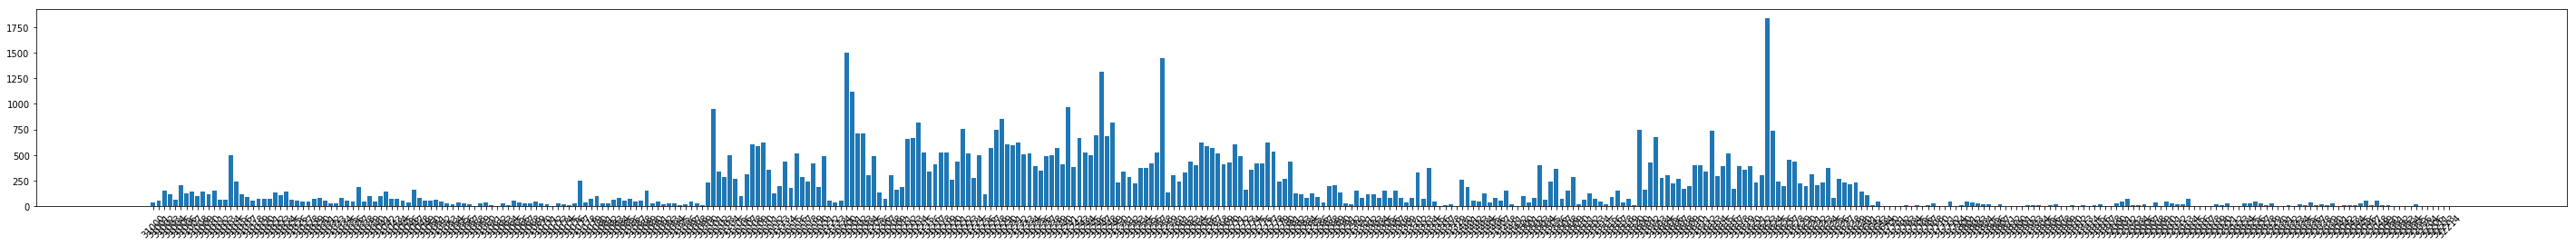

In [14]:
stations_lat_lng = df.groupby('End station number')['Duration'].count()
# print(pd.DataFrame(stations_lat_lng))
# ('End station')

plt.figure(figsize=(50,4))
plt.bar(range(len(stations_lat_lng)),stations_lat_lng)
plt.xticks(range(len(stations_lat_lng)), stations_lat_lng.index, rotation=45)
plt.show()

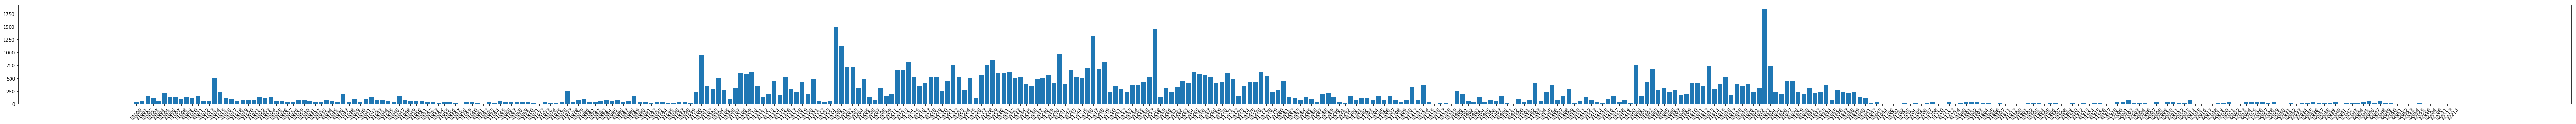

In [9]:
# stations_lat_lng = df.groupby('End station number')['Member type'].count()
# # print(pd.DataFrame(stations_lat_lng))
# # ('End station')

# plt.figure(figsize=(100,4))
# plt.bar(range(len(stations_lat_lng)),stations_lat_lng)
# plt.xticks(range(len(stations_lat_lng)), stations_lat_lng.index, rotation=45)
# plt.show()

In [33]:
df.columns

Index(['Duration', 'Start date', 'End date', 'Year', 'Month', 'Date',
       'Time_Hr', 'Start station number', 'Start station', 'Start station lat',
       'Start station lng', 'End station number', 'End station',
       'End station lat', 'End station lng', 'Bike number', 'number of bikes',
       'Member type'],
      dtype='object')

       Date  percent change
Year                       
2015  40000           100.0
2016  40000           100.0


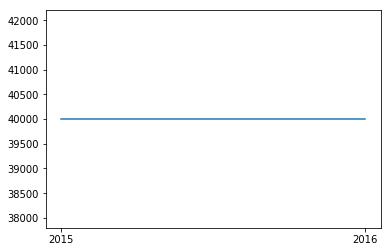

In [22]:
# # change over the years
# change_over_years=df.groupby('Year')['Date'].count()
# change_over_years=pd.DataFrame(change_over_years)
# change_over_years['percent change']=change_over_years['Date']/max(change_over_years['Date'].values)*100
# print(change_over_years)
# plt.plot(change_over_years.index, change_over_years['Date'])
# # plt.xlim(2010,2018)
# plt.show()

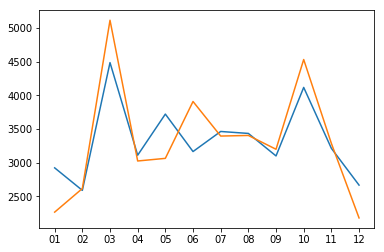

In [26]:
# change over the months
df_15=df[df['Year']=='2015']
change_over_months_15=df_15.groupby('Month')['Date'].count()

df_16=df[df['Year']=='2016']
change_over_months_16=df_16.groupby('Month')['Date'].count()

# print(pd.DataFrame(change_over_months_15))
plt.plot(change_over_months_15.index, change_over_months_15.values)
plt.plot(change_over_months_16.index, change_over_months_16.values)
plt.show()

In [56]:
# time_hrs = pd.DataFrame(df['Time_Hr'].value_counts())
# time_hrs.head()
# # time_hrs.columns

,Time_Hr
17,8548
18,8301
08,6875
16,5604
19,5459


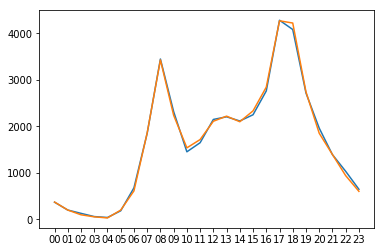

In [60]:
df_15=df[df['Year']=='2015']
change_over_months_15=df_15.groupby('Time_Hr')['Date'].count()

df_16=df[df['Year']=='2016']
change_over_months_16=df_16.groupby('Time_Hr')['Date'].count()

# print(pd.DataFrame(change_over_months_15))
plt.plot(change_over_months_15.index, change_over_months_15.values)
plt.plot(change_over_months_16.index, change_over_months_16.values)
plt.show()

In [56]:
# filename = "bike_station_location.csv"
# location_df = pd.read_csv(filename, index_col=None, header=0)
# location_df.head(2)